## Titanic - Machine Learning from Disaster

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [27]:
dt_train = pd.read_csv('~/Desktop/DataScience/titanickaggle/train.csv')

## Exploratory Data Analysis --> Multiple Regression

In [3]:
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dt_train = dt_train.drop(columns=['Name','Embarked','Ticket'])

In [5]:
dt_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
dtype: object

In [6]:
dt_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,male,22.0,1,0,7.2500,NaN
1,2,1,1,female,38.0,1,0,71.2833,C85
2,3,1,3,female,26.0,0,0,7.9250,NaN
3,4,1,1,female,35.0,1,0,53.1000,C123
4,5,0,3,male,35.0,0,0,8.0500,NaN


In [7]:
dt_train['Sex'] = dt_train['Sex'].map({'male': 1, 'female': 0})
dt_train['Cabin'] = dt_train['Cabin'].notna().astype(int)   # 1 = tem cabine, 0 = não tem


In [8]:
dt_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin            int64
dtype: object

In [9]:
dt_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


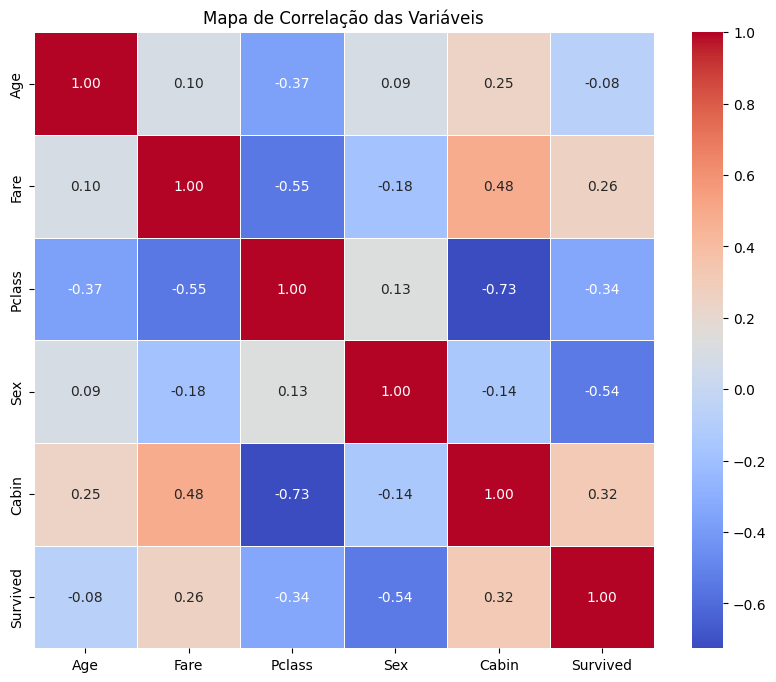

In [10]:
cols = ['Age', 'Fare', 'Pclass', 'Sex', 'Cabin', 'Survived']
matriz_correlacao = dt_train[cols].corr()

plt.figure(figsize=(10, 8))
sb.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlação das Variáveis')
plt.show()

In [11]:
dt_train['Family'] = dt_train['SibSp'] + dt_train['Parch'] + 1

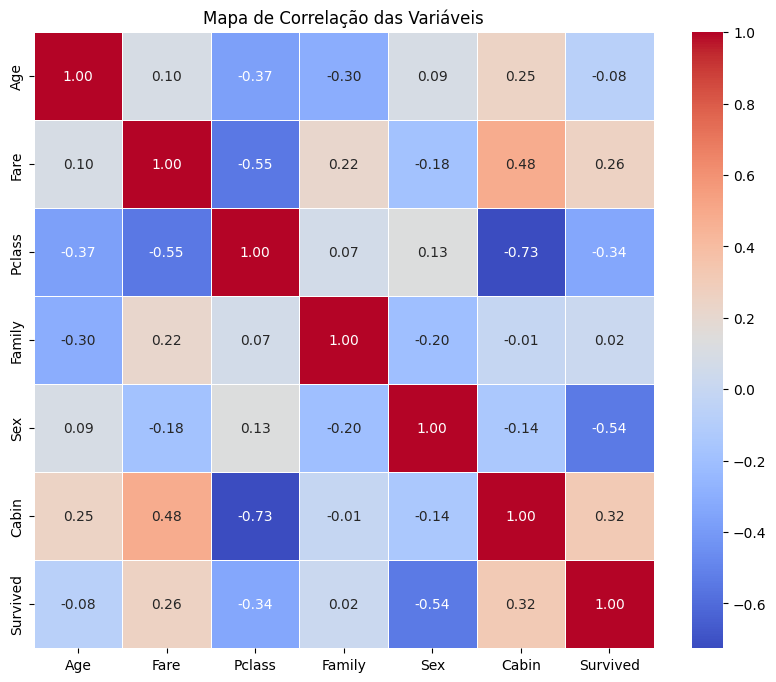

In [12]:
cols = ['Age', 'Fare', 'Pclass','Family', 'Sex', 'Cabin', 'Survived']
matriz_correlacao = dt_train[cols].corr()

plt.figure(figsize=(10, 8))
sb.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlação das Variáveis')
plt.show()

In [13]:
X = dt_train[[ 'Fare', 'Pclass', 'Sex', 'Cabin']]
y = dt_train['Survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)



Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [15]:
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Acurácia: 0.7835820895522388
Precisão: 0.7368421052631579
Recall: 0.6796116504854369
F1-Score: 0.7070707070707071


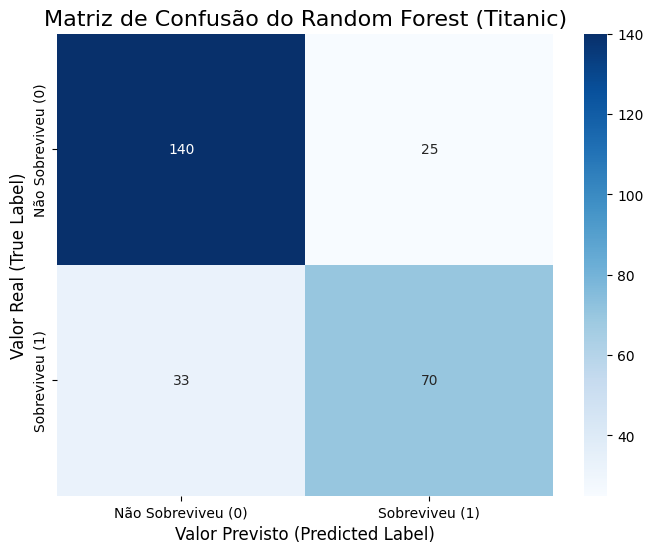

In [16]:
cm = confusion_matrix(y_test, y_pred)

labels = ['Não Sobreviveu (0)', 'Sobreviveu (1)']

plt.figure(figsize=(8, 6))

sb.heatmap(
    cm,
    annot=True,              
    fmt='d',                
    cmap='Blues',            
    xticklabels=labels,      
    yticklabels=labels     
)

plt.title('Matriz de Confusão do Random Forest (Titanic)', fontsize=16)
plt.ylabel('Valor Real (True Label)', fontsize=12)
plt.xlabel('Valor Previsto (Predicted Label)', fontsize=12)

plt.show()

In [17]:
gb = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    'n_estimators': [200, 400, 600],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_gb.fit(X_train, y_train)
y_pred_gb = grid_gb.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [18]:
print("Acurácia:", accuracy_score(y_test, y_pred_gb))
print("Precisão:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1-Score:", f1_score(y_test, y_pred_gb))

Acurácia: 0.7686567164179104
Precisão: 0.6952380952380952
Recall: 0.7087378640776699
F1-Score: 0.7019230769230769


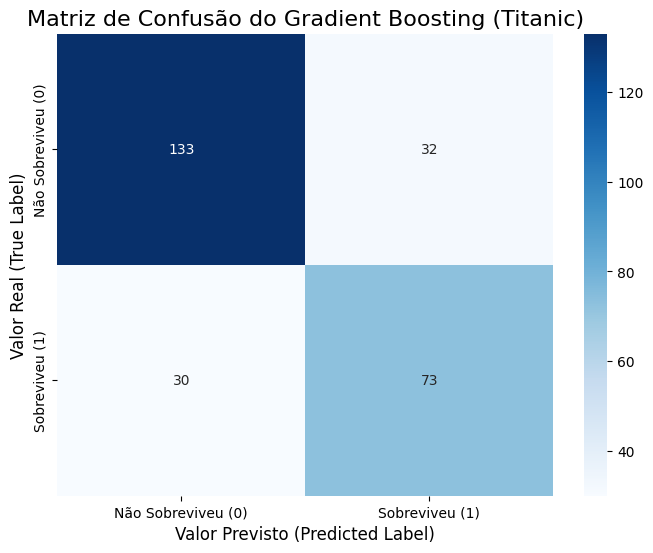

In [19]:
cm = confusion_matrix(y_test, y_pred_gb)

labels = ['Não Sobreviveu (0)', 'Sobreviveu (1)']

plt.figure(figsize=(8, 6))

sb.heatmap(
    cm,
    annot=True,              
    fmt='d',                
    cmap='Blues',            
    xticklabels=labels,      
    yticklabels=labels     
)

plt.title('Matriz de Confusão do Gradient Boosting (Titanic)', fontsize=16)
plt.ylabel('Valor Real (True Label)', fontsize=12)
plt.xlabel('Valor Previsto (Predicted Label)', fontsize=12)
plt.show()

# Submission for Kaggle

In [28]:
dt_test = pd.read_csv('~/Desktop/DataScience/titanickaggle/test.csv')
dt_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
dt_test['Sex'] = dt_test['Sex'].map({'male': 1, 'female': 0})
dt_test['Cabin'] = dt_test['Cabin'].notna().astype(int)   # 1 = tem cabine, 0 = não tem

In [22]:
dt_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int64
Embarked        object
dtype: object

In [26]:
y = dt_train["Survived"]

X = dt_train[[ 'Fare', 'Pclass', 'Sex', 'Cabin']]
X_test = dt_test[[ 'Fare', 'Pclass', 'Sex', 'Cabin']]

grid.fit(X, y)
y_pred = grid.predict(X_test)

output = pd.DataFrame({'PassengerId': dt_test.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
print("Submission was successfully saved!")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Submission was successfully saved!
